# Transformée de Fourier rapide et convolution rapide

L'objectif de ce TP est d'explorer et les différents algorithmes utilisés en pratique pour calculer la transformée de Fourier rapide d'un signal et le produit de convolution de deux signaux.

In [1]:
# Imports 
from math import *
import numpy as np
import matplotlib.pyplot as plt

Dans la portion de code qui suit, on commence par définir deux signaux quelconques $f$ et $g$ de taille $N = 256$. On considérera ici des signaux correspondant à une combinaison linéaire d'un petit nombre de fonctions oscillantes.

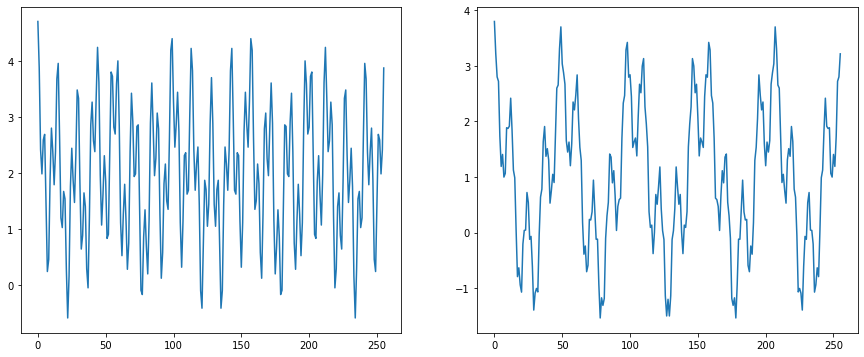

In [2]:
# Defines two signals f and g 
N = 256
t = np.arange(N)
f = 2. + 0.5*np.cos((2*pi/N)*5*t) + 1.2*np.cos((2*pi/N)*18*t) + np.cos((2*pi/N)*52*t)
g = 1. + 1.5*np.cos((2*pi/N)*5*t) + 0.3*np.cos((2*pi/N)*84*t) + np.cos((2*pi/N)*21*t)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(t, f)
ax[1].plot(t, g)
plt.show()



(1) En partant de la définition de la transformée de Fourier, implémenter un algorithme qui calcule les transformées de Fourier directe et inverse d'un signal $f$ de taille $N$. Combiens d'opérations (additions et multiplications) faut-il effectuer au cours du calcul?

In [3]:
def fourier_transform(f, inverse=False):
    
    """
    Fourier transform
    
    :param f: Input signal
    :type f: numpy array
    :param inverse: If True, computes the inverse Fourier transform
    :type inverse: Boolean
    
    :return: Fourier transform of f
    :rtype: complex numpy array
    """

**Comparaison avec le résultat obtenu avec la fonction de numpy pour valider le calcul:**

In [ ]:
# Direct Fourier transform
fhat = fourier_transform(f)
fcheck = np.fft.fft(f)
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(np.abs(fhat))
plt.title('Ma tf')
plt.subplot(1, 2, 2)
plt.plot(np.abs(fcheck))
plt.title('fft numpy')
plt.show()

In [ ]:
# Direct Fourier transform
ghat = fourier_transform(g)
gcheck = np.fft.fft(g)
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(np.abs(ghat))
plt.title('Ma tf')
plt.subplot(1, 2, 2)
plt.plot(np.abs(gcheck))
plt.title('fft numpy')
plt.show()

In [ ]:
# Inverse Fourier transform
frec = fourier_transform(fhat, inverse=True)
grec = fourier_transform(ghat, inverse=True)

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.plot(f)
plt.title('f')
plt.subplot(2, 2, 2)
plt.plot(frec.real)
plt.title('f reconstruit')
plt.subplot(2, 2, 3)
plt.plot(g)
plt.title('g')
plt.subplot(2, 2, 4)
plt.plot(grec.real)
plt.title('g reconstruit')
plt.show()

(2) Soit $f$ signal de taille $N$. Dans tout ce qui suit, pour simplifier les raisonnements, on supposera que $N$ est une puissance de $2$. Montrer que pour tout entier $k$ dans $\{1, ..., N/2\}$, on vérifie:

$$
\hat{f}[2k] = \sum_{n = 0}^{N/2 - 1} (f[n] + f[n + N/2])\exp \bigg ( -i\frac{2 \pi kn}{N/2}\bigg )
$$
et
$$
\hat{f}[2k + 1] = \sum_{n = 0}^{N/2 - 1} \exp \bigg (-i\frac{2 \pi n}{N} \bigg )\bigg (f[n] - f[n + N/2]\bigg)\exp \bigg ( -i\frac{2 \pi kn}{N/2}\bigg )
$$

En déduire que la transformée de Fourier du signal $f$ de taille $N$ peut se déduire des transformées de Fourier des signaux $f_p$ et $f_q$ de tailles $N/2$, où:


$$
\forall n \in \{0, ..., N/2 - 1\}, \quad f_p[n] = f[n] + f[n + N/2])
$$

et

$$
\forall n \in \{0, ..., N/2 - 1\}, \quad f_q[n] = \exp \bigg (-i\frac{2 \pi n}{N} \bigg )(f[n] - f[n + N/2])
$$


Implémenter l'algorithme de calcul correspondant.

In [ ]:
def fft(f):
    
    """
    Implementation of the Fast Fourier transform algorithm
    
    :param f: Input signal
    :type f: numpy array
    
    :return: Fourier transform of f
    :rtype: numpy array
    """

**Comparaison des deux méthodes de calcul pour validation:**

In [ ]:
fhat = fft(f)
fcheck = fourier_transform(f)

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(fhat.real)
plt.subplot(1, 2, 2)
plt.plot(fcheck.real)
plt.show()

In [ ]:
ghat = fft(g)
gcheck = fourier_transform(g)

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(ghat.real)
plt.subplot(1, 2, 2)
plt.plot(gcheck.real)
plt.show()

(3) On note $f^*$ le conjugué complexe du signal $f$. Montrer que 

$$
\forall n \in \{0, ..., N - 1\}, \quad f^*[n] = \dfrac{1}{N}\sum_{k = 0}^{N - 1} \hat{f}^*[k] \exp \bigg (-\dfrac{i 2 \pi kn}{N} \bigg ).
$$

En déduire un algorithme permettant de calculer la transformée de Fourier rapide inverse à partir de la transformée directe et implémenter cet algorithme.

In [ ]:
def ifft(fhat):
    
    """
    Implementation of the inverse fast Fourier transform
    
    :param fhat: Fourier coefficients
    :type fhat: numpy array
    
    :return: Reconstructed function
    :rtype: numpy array
    """

**Validation du calcul de la transformée de Fourier inverse**

In [ ]:
frec = ifft(fhat)
grec = ifft(ghat)
plt.figure(figsize = (15, 6))
plt.subplot(2, 2, 1)
plt.title('f')
plt.plot(f)
plt.subplot(2, 2, 2)
plt.title('f reconstruit')
plt.plot(frec.real)
plt.subplot(2, 2, 3)
plt.title('g')
plt.plot(g)
plt.subplot(2, 2, 4)
plt.title('g reconstruit')
plt.plot(grec.real)
plt.show()

(4) Pour tout entier $N$, on note $C(N)$ le nombre d'opérations élémentaires requises pour calculer la transformée de Fourier d'un signal de taille $N$. En comptant le nombre d'opérations (additions et multiplications) effectuées dans l'algorithme précédent, montrer que 

$$
C(N) = 2C(N/2) + KN,
$$

où $K$ est une constante.

(5) En effectuant le changement de variable $l = \log_2 (N)$ et en considérant la fonction 

$$
T(l) = \dfrac{C(2^l)}{2^l} = \dfrac{C(N)}{N},
$$

montrer que $C(N) = K N \log_2 (N)$.

# Convolution rapide

(6) Nous nous intéressons maintenant à des algorithmes permettant de calculer la convolution de deux signaux $f$ et $g$. Pour simplifier, nous supposerons dans cette section que $f$ et $g$ sont des signaux discrets de taille $M$, non nuls uniquement pour $0 \leq n < M$. On rappelle que le produit de convolution des signaux $f$ et $g$ est le signal $h$ défini par

$$
h[n] = f*g[n] = \sum_{k = - \infty}^{+ \infty }f[k]g[n - k].
$$

a. Pour quelles valeurs de $n$ a-t-on nécessairement $h[n] = 0$?

b. En déduire le nombre d'opérations (additions et multiplications) nécessaires pour évaluer $h$.

c. Implémenter un algorithme calculant $h$ à partir de la formule précédente, et vérifier que le produit de convolution implémenté dans numpy (fonction numpy.convolve) permet d'obtenir le même résultat (mode: "full").

In [ ]:
def convolution(f, g):
    
    """
    Convolution between two signals with same size M
    
    :param f: Signal
    :type f: numpy array
    :param g: Second signal
    :type g: numpy array
    
    :return: Convolution between f and g
    :rtype: numpy array
    """

**Validation du calcul de la convolution directe**

La fonction de la librairie numpy qui calcule la convolution de deux signaux est la fonction "convolve". Différents modes de convolution peuvent être spécifiés. Le mode "full" correspond au cas où les signaux ne sont pas périodisés et sont donc nuls hors de leur support.



In [ ]:
h = convolution(f, g)
hcheck = np.convolve(f, g, mode='full')
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(h)
plt.title('Ma convolution')
plt.subplot(1, 2, 2)
plt.plot(hcheck)
plt.title('Convolution numpy full')
plt.show()

(7) Un autre moyen de calculer le produit de convolution de deux signaux (cf. cours) est:
1. de calculer la transformée de Fourier de ces signaux
2. de calculer le produit des deux transformées de Fourier
3. de calculer la transformée inverse du produit

Cet algorithme est appelé convolution rapide. Implémenter l'algorithme proposé ci-dessus. Retrouve-t-on le même résultat qu'avec l'algorithme implémenté précédemment? Pourquoi? 

In [ ]:
def fast_circular_convolution(f, g):
    
    """
    Convolution between two signals with same size M computed with 
    the fast Fourier transform algorithm.
    
    :param f: Signal
    :type f: numpy array
    :param g: Second signal
    :type g: numpy array
    
    :return: Convolution between f and g
    :rtype: numpy array
    """

In [ ]:
h = fast_circular_convolution(f, g)
plt.figure(figsize = (15, 5))
plt.plot(h.real)
plt.show()


(8) Afin de remédier au problème de périodisation induit par la transformée de Fourier, une solution simple consiste à ajouter $M$ zéros à la fin des deux signaux $f$ et $g$. Implémenter le nouvel algorithme proposé, et vérifier qu'on retrouve bien les résultats obtenus avec le premier algorithme.

In [ ]:
def fast_convolution(f, g):
    
    """
    Convolution between two signals with same size M computed with 
    the fast Fourier transform algorithm.
    
    :param f: Signal
    :type f: numpy array
    :param g: Second signal
    :type g: numpy array
    
    :return: Convolution between f and g
    :rtype: numpy array
    """   

In [ ]:
h = fast_convolution(f, g)
hcheck = np.convolve(f, g, mode='full')#valid
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(h.real)
plt.title('Ma convolution')
plt.subplot(1, 2, 2)
plt.plot(hcheck)
plt.title('Convolution numpy')
plt.show()

(9) Déterminer le nombre d'opérations nécessaires pour le calcul d'une convolution rapide. On supposera pour ce faire que le nombre d'opérations nécessaires pour calculer la transformée de Fourier d'un signal de taille $M$ est $\dfrac{M}{2} \log_2(M)$. Quel algorithme est le plus efficace lorsque $M$ est grand?